In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load dataset
data = pd.read_csv('group_23.csv')

In [13]:
# overview da estrutura básica

print(f"Shape: {data.shape}")
print(f"Número de samples: {data.shape[0]}")
print(f"Número de features: {data.shape[1]}")

Shape: (3000, 49)
Número de samples: 3000
Número de features: 49


In [14]:
# verificar nomes e data types -- não há datatypes inválidos
print(data.dtypes)

duration_1                       float64
duration_2                       float64
duration_3                       float64
duration_4                       float64
duration_5                       float64
loudness_level                   float64
popularity_level                 float64
tempo_class                      float64
time_signature                   float64
key_mode                         float64
artist_song_count                float64
album_freq                       float64
movement_index                   float64
intensity_level                  float64
verbal_density                   float64
purity_score                     float64
positivity_index                 float64
activity_rate                    float64
loudness_intensity               float64
happy_dance                      float64
acoustics_instrumental           float64
artists_avg_popularity           float64
tempo_vs_genre                   float64
energy_rank_pct                  float64
loud_energy_rati

In [15]:
# Set pandas to display ALL columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(data.sample(15))

      duration_1  duration_2  duration_3  duration_4  duration_5  \
2199         0.0         1.0         0.0         0.0         0.0   
1156         0.0         0.0         1.0         0.0         0.0   
1231         0.0         0.0         1.0         0.0         0.0   
1497         0.0         0.0         1.0         0.0         0.0   
1882         0.0         1.0         0.0         0.0         0.0   
2880         0.0         1.0         0.0         0.0         0.0   
1365         1.0         0.0         0.0         0.0         0.0   
814          0.0         0.0         1.0         0.0         0.0   
521          0.0         0.0         1.0         0.0         0.0   
1273         0.0         0.0         1.0         0.0         0.0   
1009         0.0         1.0         0.0         0.0         0.0   
2522         0.0         0.0         0.0         1.0         0.0   
2201         0.0         1.0         0.0         0.0         0.0   
2667         0.0         1.0         0.0        

In [16]:
# vemos que focus factor aparece como object, mas tem valores numéricos - converter de string para numero

data['focus_factor'] = (
    data['focus_factor']
    .astype(str)
    .str.replace(',', '.')  # substituir virgulas por pontos
    .astype(float)           # converter para float
)

# verificar que está correto
print(f"New dtype: {data['focus_factor'].dtype}")

New dtype: float64


In [17]:
# análise de valores em falta

missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({'Contagem de valores em falta': missing_data, 'Percentagem de valores em falta': missing_percent})

print(missing_summary[missing_summary['Contagem de valores em falta'] > 0])

Empty DataFrame
Columns: [Contagem de valores em falta, Percentagem de valores em falta]
Index: []


In [18]:
# verificar se existem linhas duplicadas -- duplicates afetam negativamente a análise ao inflacionar padrões
print(f"Número de linhas duplicadas: {data.duplicated().sum()}")

Número de linhas duplicadas: 0


In [22]:
# análise de features numericas e categoricas separadamente
categorical_features = ['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5', 'loudness_level', 'popularity_level', 'tempo_class', 'explicit', 'mode_indicator', 'time_signature_class_boolean', 'is_instrumental', 'is_dance_hit', 'echo_constant', 'target_class']

numericals = [col for col in data.columns if col not in categorical_features]
numerical_cols = data[numericals]
categorical_cols = data[categorical_features]

In [23]:
# numerical
print("Sumário das features numéricas - quantidade, média, dispersão, intervalo de valores, distribuição e outliers")
numerical_summary = numerical_cols.describe()
print(numerical_summary)
print("\n")

Sumário das features numéricas - quantidade, média, dispersão, intervalo de valores, distribuição e outliers
          key_mode  artist_song_count   album_freq  movement_index  \
count  3000.000000        3000.000000  3000.000000     3000.000000   
mean      0.007190          -0.026180     0.528896        0.518288   
std       1.001145           0.845489     1.590215        0.783160   
min      -1.511882          -0.575306    -0.514901       -2.643743   
25%      -0.920961          -0.503174    -0.472292        0.029960   
50%       0.176466          -0.334865    -0.344467        0.652288   
75%       0.767388           0.097928     0.976400        1.107509   
max       1.611562           4.257551     7.751164        2.058287   

       intensity_level  verbal_density  purity_score  positivity_index  \
count      3000.000000     3000.000000   3000.000000       3000.000000   
mean          0.411550       -0.102081     -0.169978          0.925406   
std           0.540654        0.578511

In [24]:
# skewness and kurtosis
# skewness mede a assimetria da distribuição (0 - distribuição normal | positvo - pico tende para a esquerda | negativo - pico tende para a direita
# kurtosis descreve a distribuição dos dados à volta da média (positivo - mais outliers | negativo - menos outliers)

skewness = numerical_cols.skew()
kurtosis = numerical_cols.kurtosis()

additional_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
print(additional_stats)

                                Skewness    Kurtosis
key_mode                       -0.095833   -1.269686
artist_song_count               2.925218    9.701253
album_freq                      1.912720    3.780198
movement_index                 -0.654822    0.074812
intensity_level                -1.490323    4.678333
verbal_density                  2.786757    9.872430
purity_score                    0.759016   -0.633160
positivity_index               -0.844261    0.005495
activity_rate                   0.642758   -0.881502
loudness_intensity             -0.682305    0.646267
happy_dance                    -0.377273   -0.585925
acoustics_instrumental         15.733571  293.648564
artists_avg_popularity          0.190533    0.484636
tempo_vs_genre                  0.686670   -0.733710
energy_rank_pct                -0.323010   -0.645130
loud_energy_ratio              23.791377  938.851443
mood_pca                       -0.937935    0.669881
mood_cluster                    0.592184   -1.

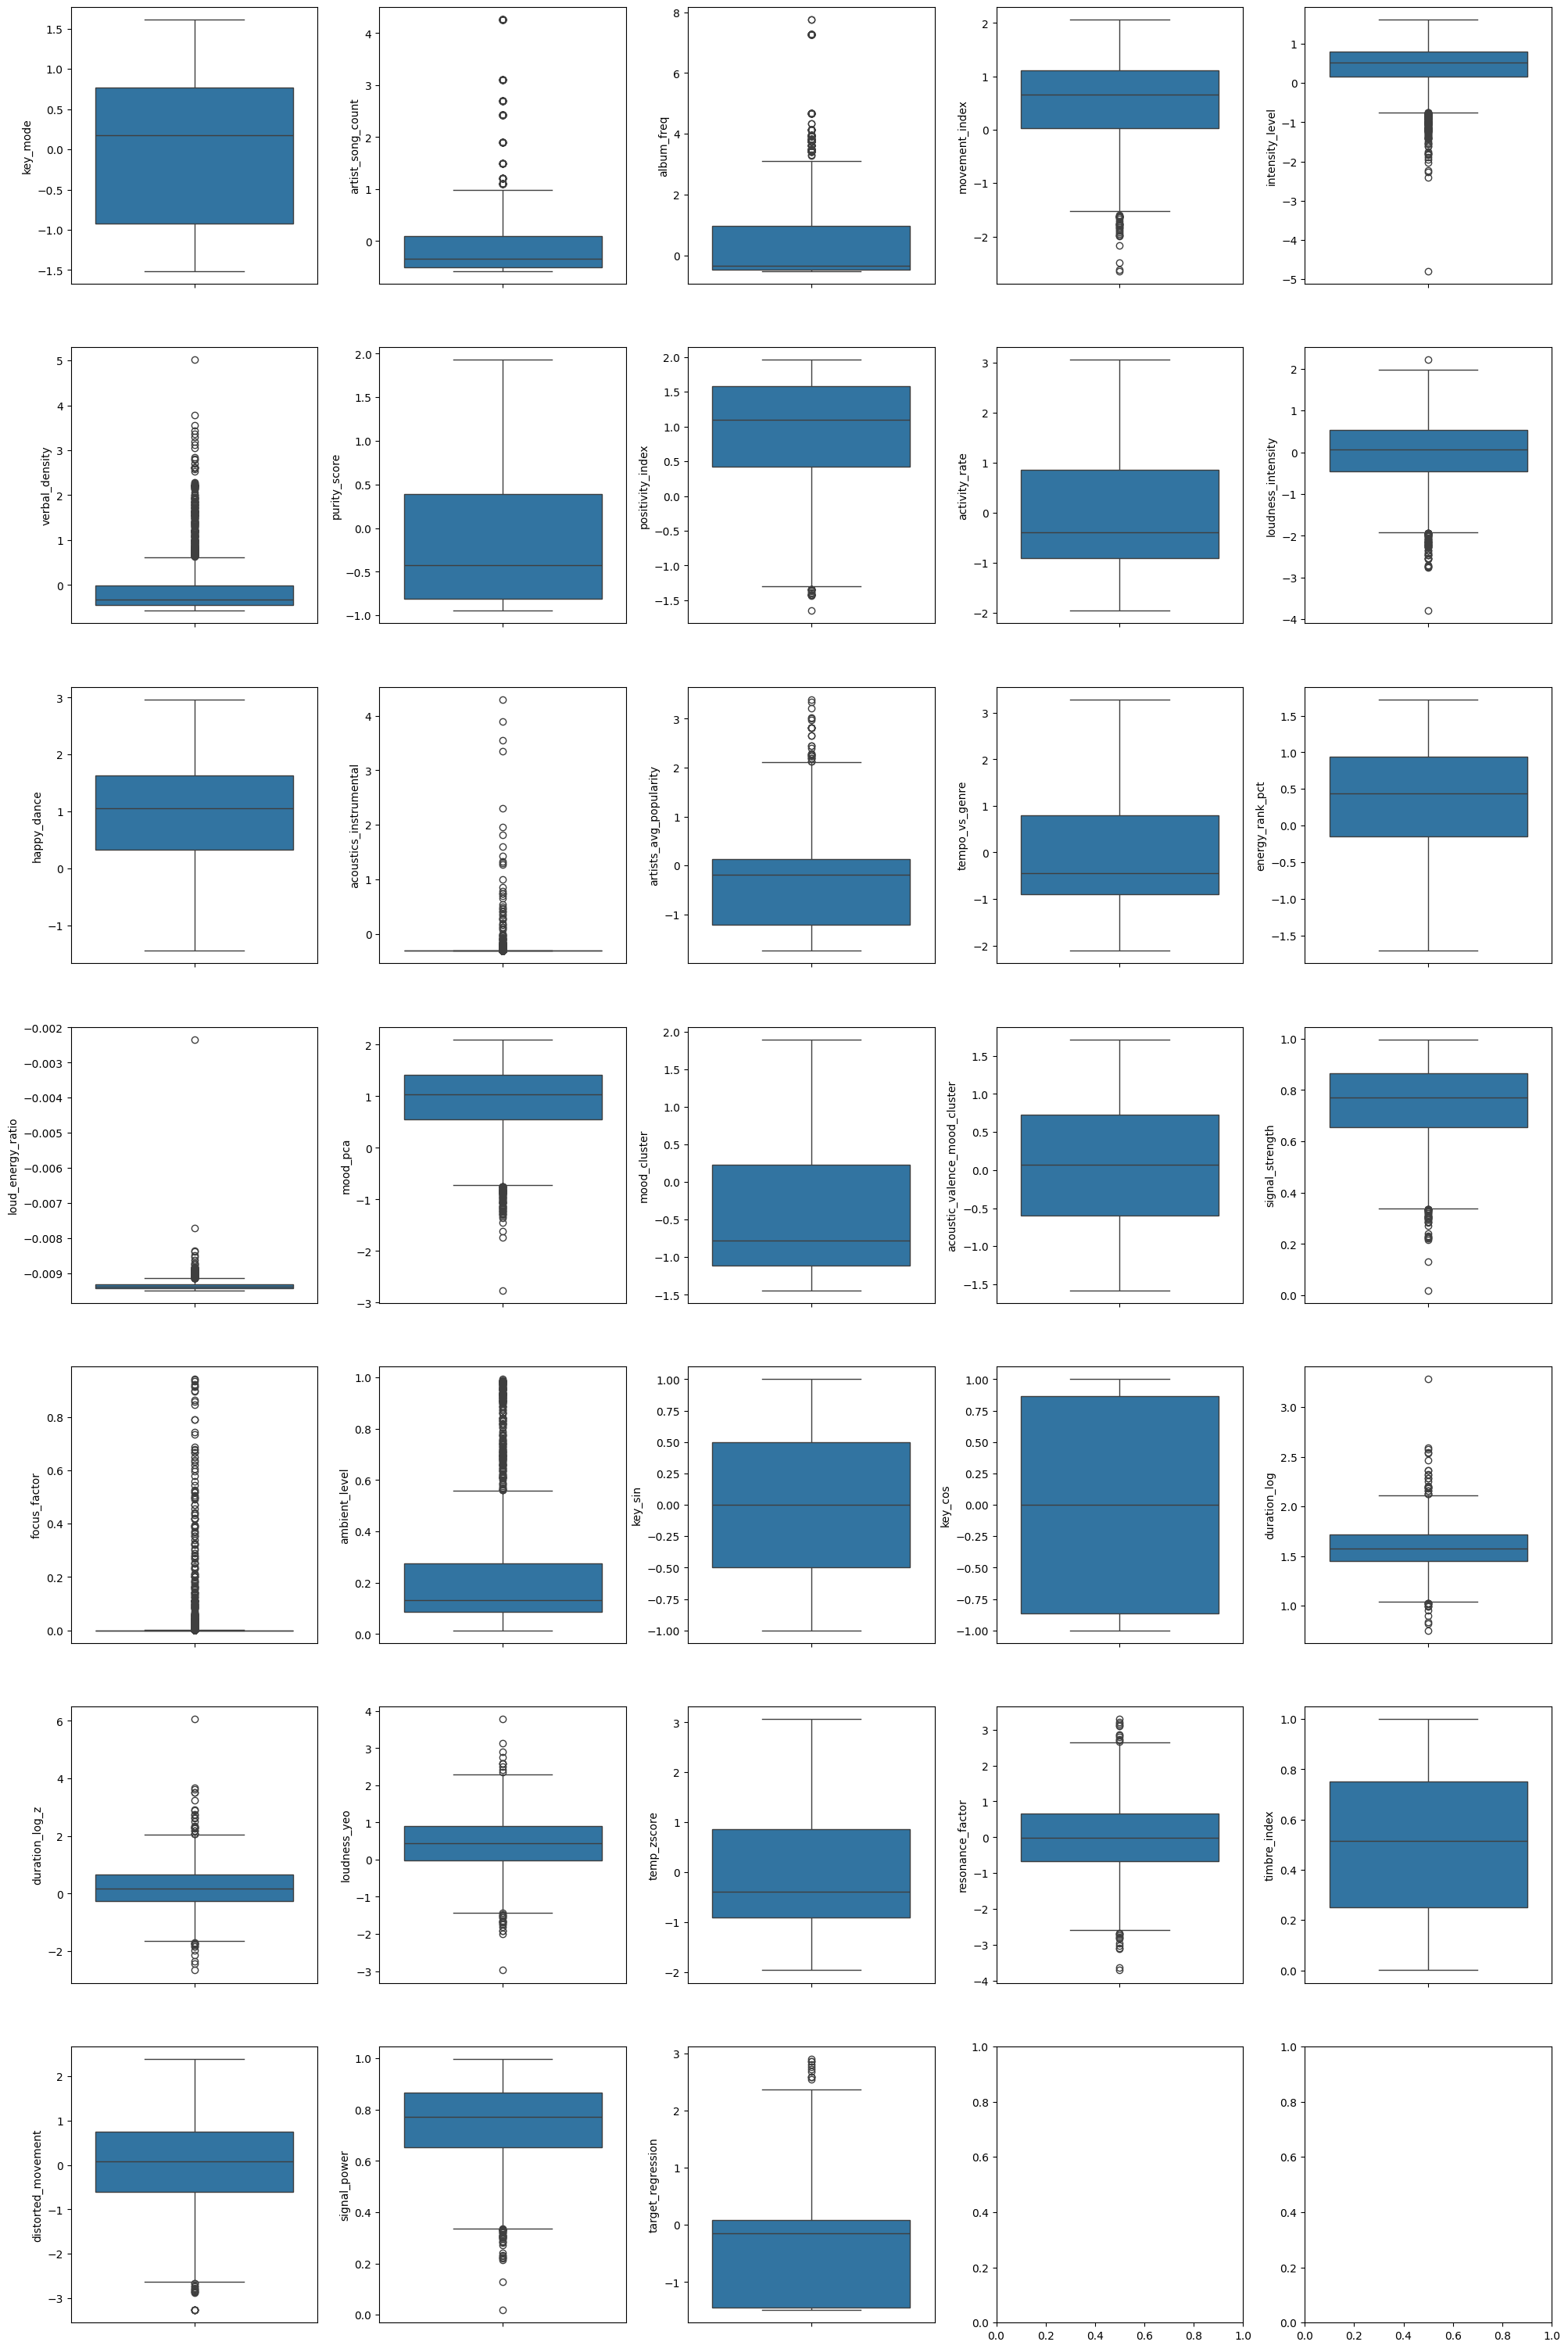

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# to calculate the grid size based on number of features
import math

# VISUALIZING OUTLIERS

fig, axs = plt.subplots(ncols=5, nrows=7, figsize=(20, 30))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [26]:
# checking outlier percentage in every column

for k in numerical_cols:
        v = numerical_cols[k]  # Get the column data from your DataFrame
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column key_mode outliers = 0.00%
Column artist_song_count outliers = 7.10%
Column album_freq outliers = 8.23%
Column movement_index outliers = 1.07%
Column intensity_level outliers = 4.17%
Column verbal_density outliers = 8.93%
Column purity_score outliers = 0.00%
Column positivity_index outliers = 0.63%
Column activity_rate outliers = 0.00%
Column loudness_intensity outliers = 1.93%
Column happy_dance outliers = 0.00%
Column acoustics_instrumental outliers = 20.47%
Column artists_avg_popularity outliers = 0.97%
Column tempo_vs_genre outliers = 0.00%
Column energy_rank_pct outliers = 0.00%
Column loud_energy_ratio outliers = 5.27%
Column mood_pca outliers = 2.47%
Column mood_cluster outliers = 0.00%
Column acoustic_valence_mood_cluster outliers = 0.00%
Column signal_strength outliers = 1.23%
Column focus_factor outliers = 20.50%
Column ambient_level outliers = 6.77%
Column key_sin outliers = 0.00%
Column key_cos outliers = 0.00%
Column duration_log outliers = 1.23%
Column duration_log_

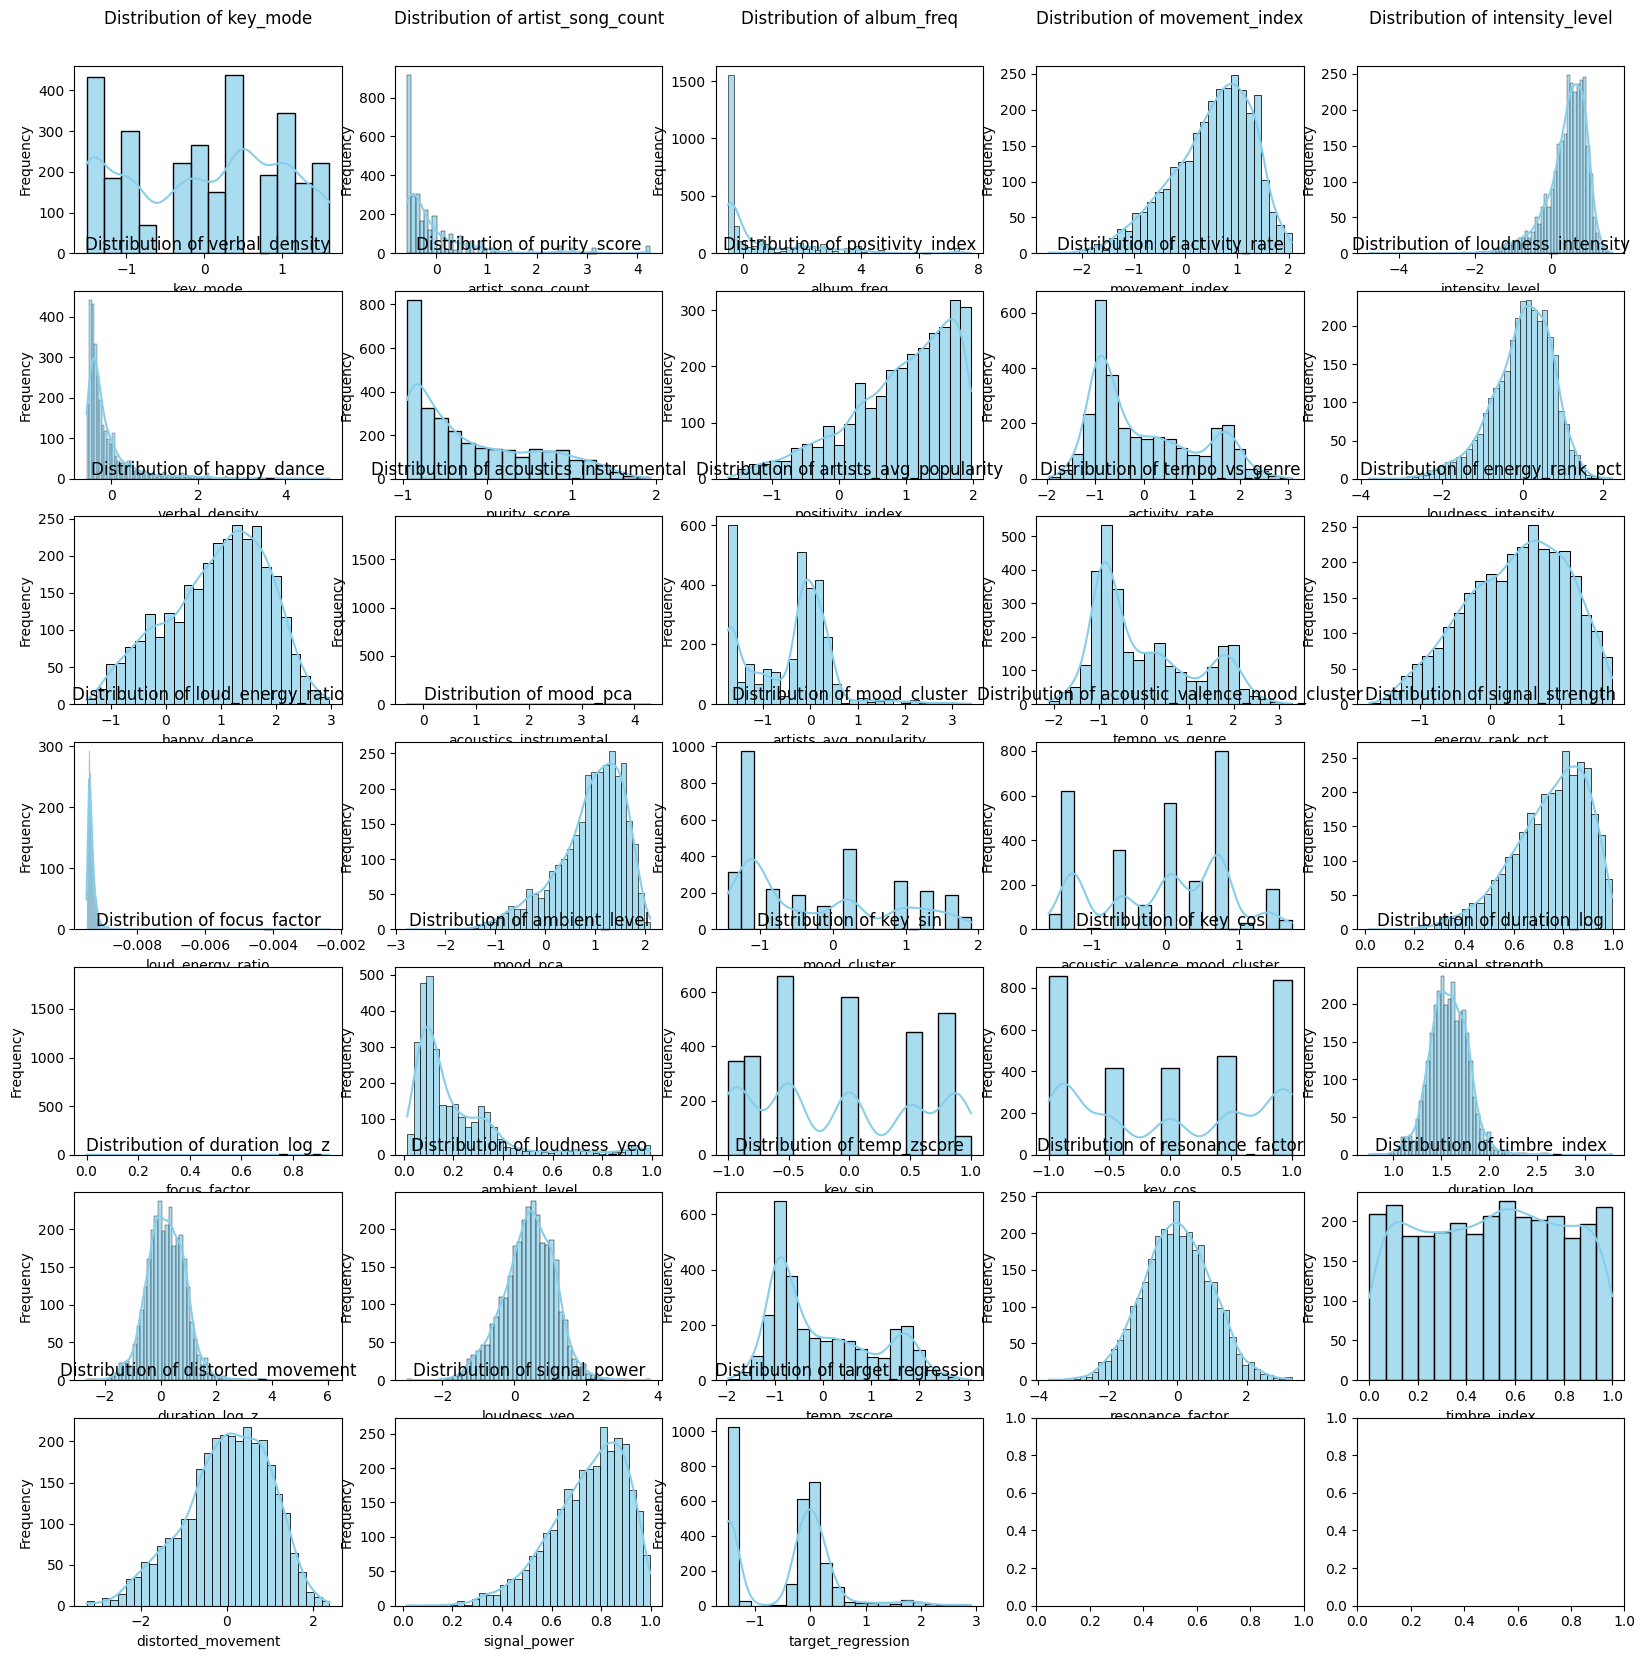

In [29]:
# distribution

fig, axs = plt.subplots(ncols=5, nrows=7, figsize=(20, 20))
axs = axs.flatten()

for index, feature in enumerate(numerical_cols):
    # Create histogram with density curve
    sns.histplot(numerical_cols[feature], ax=axs[index], kde=True, alpha=0.7, color='skyblue')
    axs[index].set_title(f'Distribution of {feature}', fontsize=12, pad=30)
    axs[index].set_xlabel(feature, fontsize=10)
    axs[index].set_ylabel('Frequency', fontsize=10)

In [30]:
# sumário das características categóricas

print("\n=== CATEGORICAL FEATURES SUMMARY ===")

# looking at each categorical feature one by one
for col in categorical_cols:
    print(f"\n--- Analyzing: {col} ---")
    
    # Count how many different categories exist
    num_categories = categorical_cols[col].nunique()
    print(f"This feature has {num_categories} different categories")
    
    # Show the most common categories and how often they appear
    print("Most common values and their counts:")
    value_counts = categorical_cols[col].value_counts()
    print(value_counts.head())  # Show top 5 most frequent
    
    # Also show percentages to understand distribution
    print("As percentages:")
    percentages = categorical_cols[col].value_counts(normalize=True) * 100
    print(percentages.head().round(2))


=== CATEGORICAL FEATURES SUMMARY ===

--- Analyzing: duration_1 ---
This feature has 2 different categories
Most common values and their counts:
duration_1
0.0    2715
1.0     285
Name: count, dtype: int64
As percentages:
duration_1
0.0    90.5
1.0     9.5
Name: proportion, dtype: float64

--- Analyzing: duration_2 ---
This feature has 2 different categories
Most common values and their counts:
duration_2
0.0    2007
1.0     993
Name: count, dtype: int64
As percentages:
duration_2
0.0    66.9
1.0    33.1
Name: proportion, dtype: float64

--- Analyzing: duration_3 ---
This feature has 2 different categories
Most common values and their counts:
duration_3
0.0    2000
1.0    1000
Name: count, dtype: int64
As percentages:
duration_3
0.0    66.67
1.0    33.33
Name: proportion, dtype: float64

--- Analyzing: duration_4 ---
This feature has 2 different categories
Most common values and their counts:
duration_4
0.0    2303
1.0     697
Name: count, dtype: int64
As percentages:
duration_4
0.0  

In [31]:
print("As categorias estão perfeitamente balanceadas, o que indica que o modelo não será biased")

As categorias estão perfeitamente balanceadas, o que indica que o modelo não será biased



Visualizing: duration_1


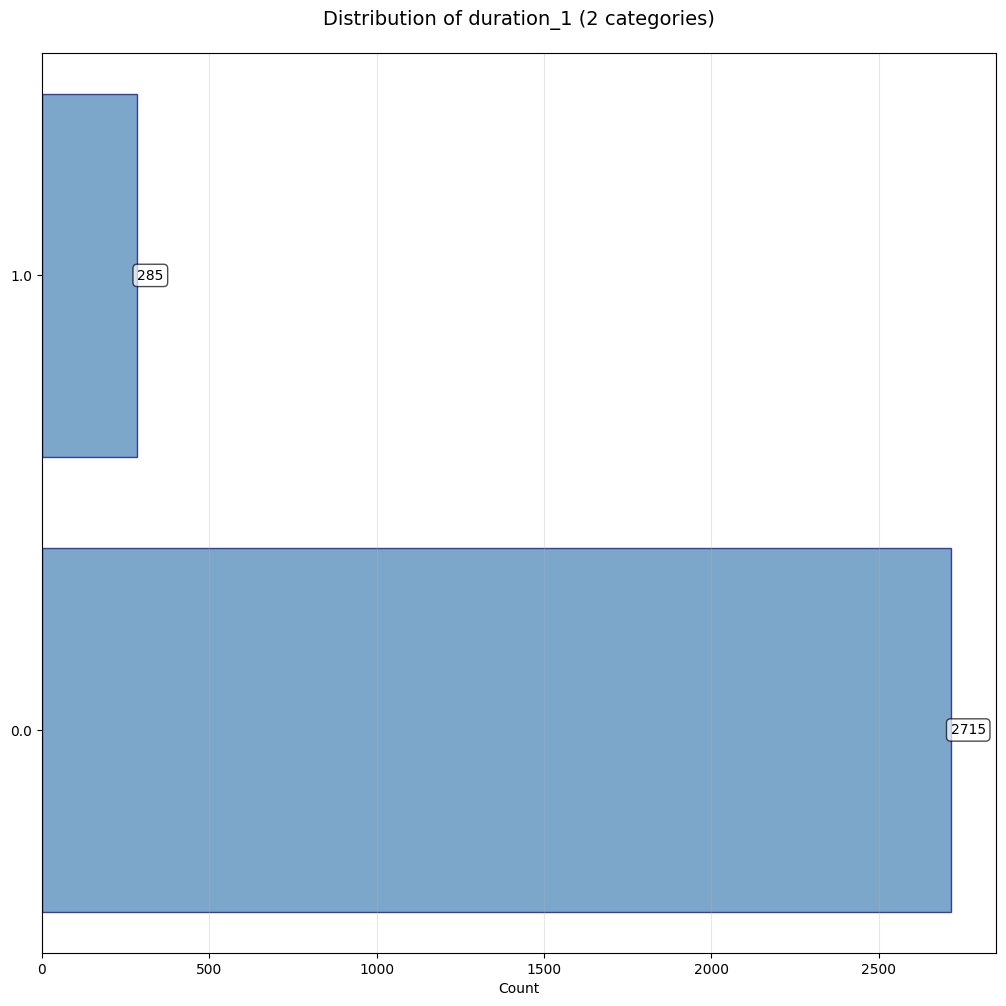

Categories: 2
Most common: '0.0' (2715 times)
Least common: '1.0' (285 times)
--------------------------------------------------

Visualizing: duration_2


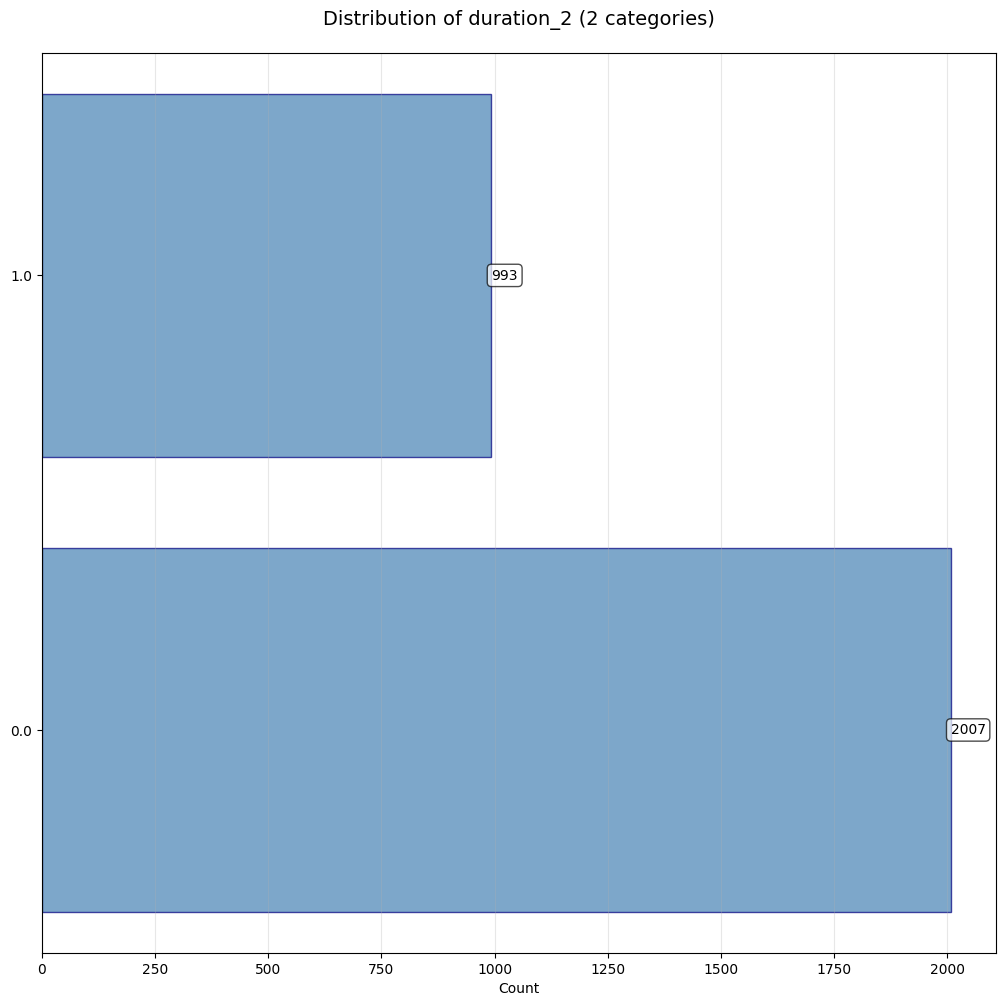

Categories: 2
Most common: '0.0' (2007 times)
Least common: '1.0' (993 times)
--------------------------------------------------

Visualizing: duration_3


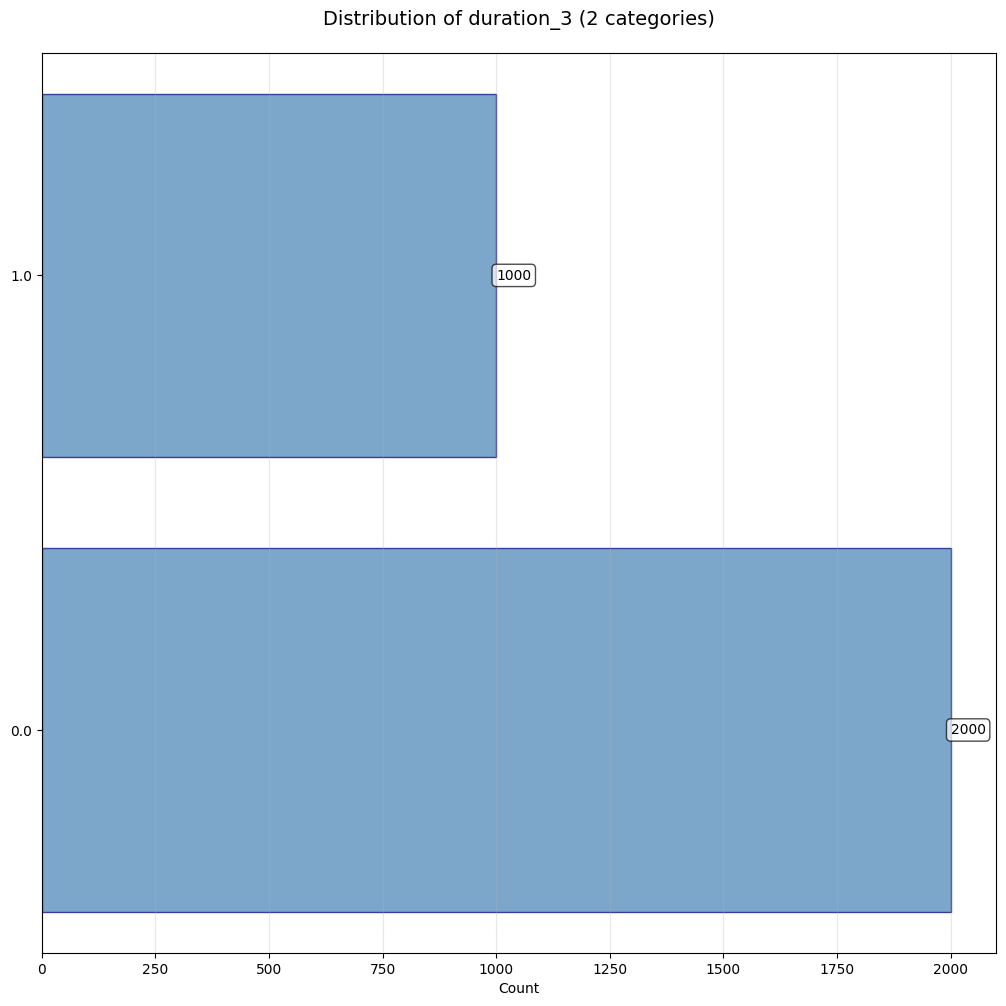

Categories: 2
Most common: '0.0' (2000 times)
Least common: '1.0' (1000 times)
--------------------------------------------------

Visualizing: duration_4


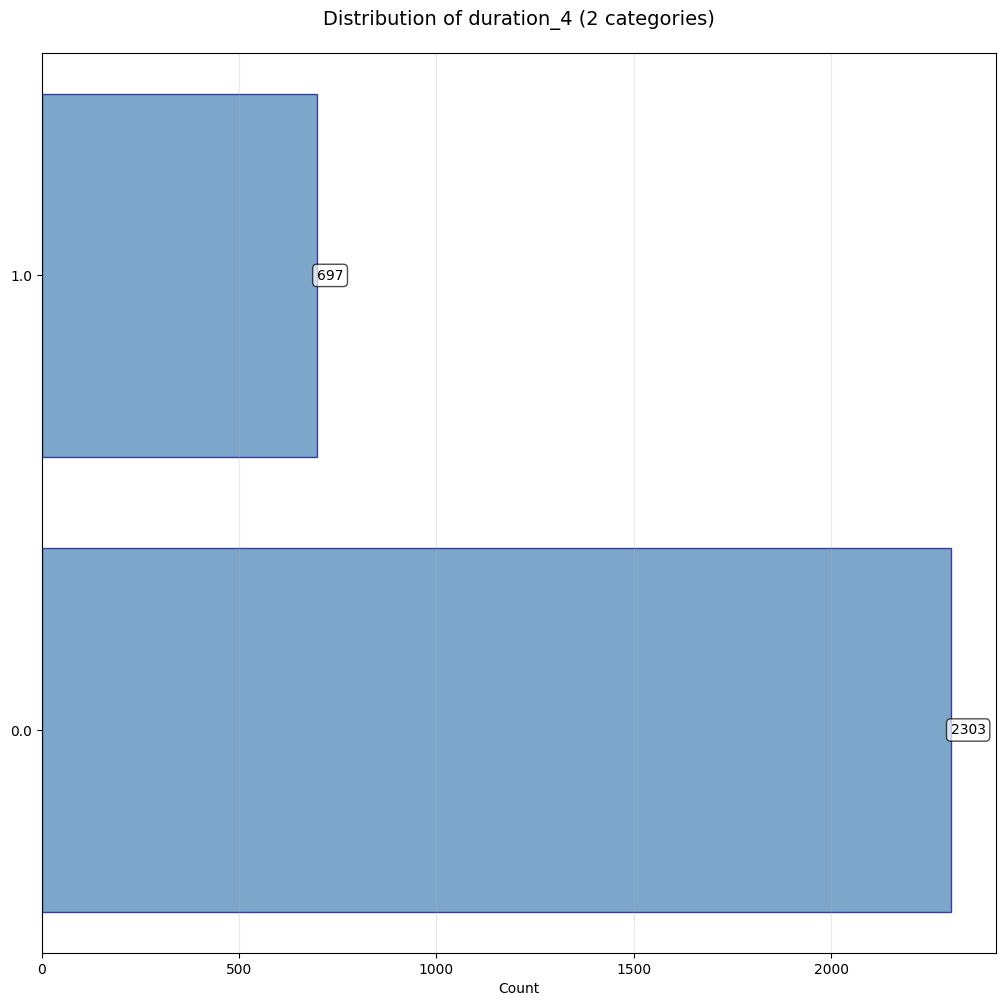

Categories: 2
Most common: '0.0' (2303 times)
Least common: '1.0' (697 times)
--------------------------------------------------

Visualizing: duration_5


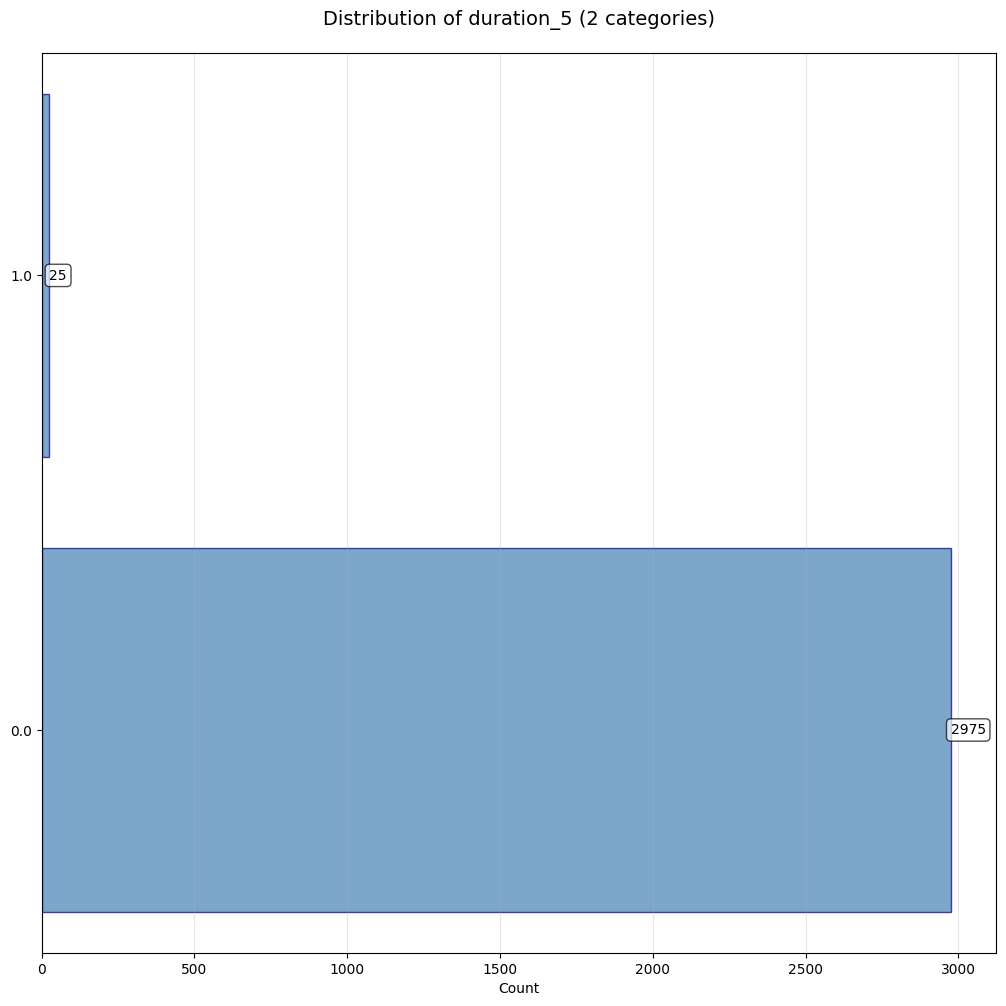

Categories: 2
Most common: '0.0' (2975 times)
Least common: '1.0' (25 times)
--------------------------------------------------

Visualizing: loudness_level


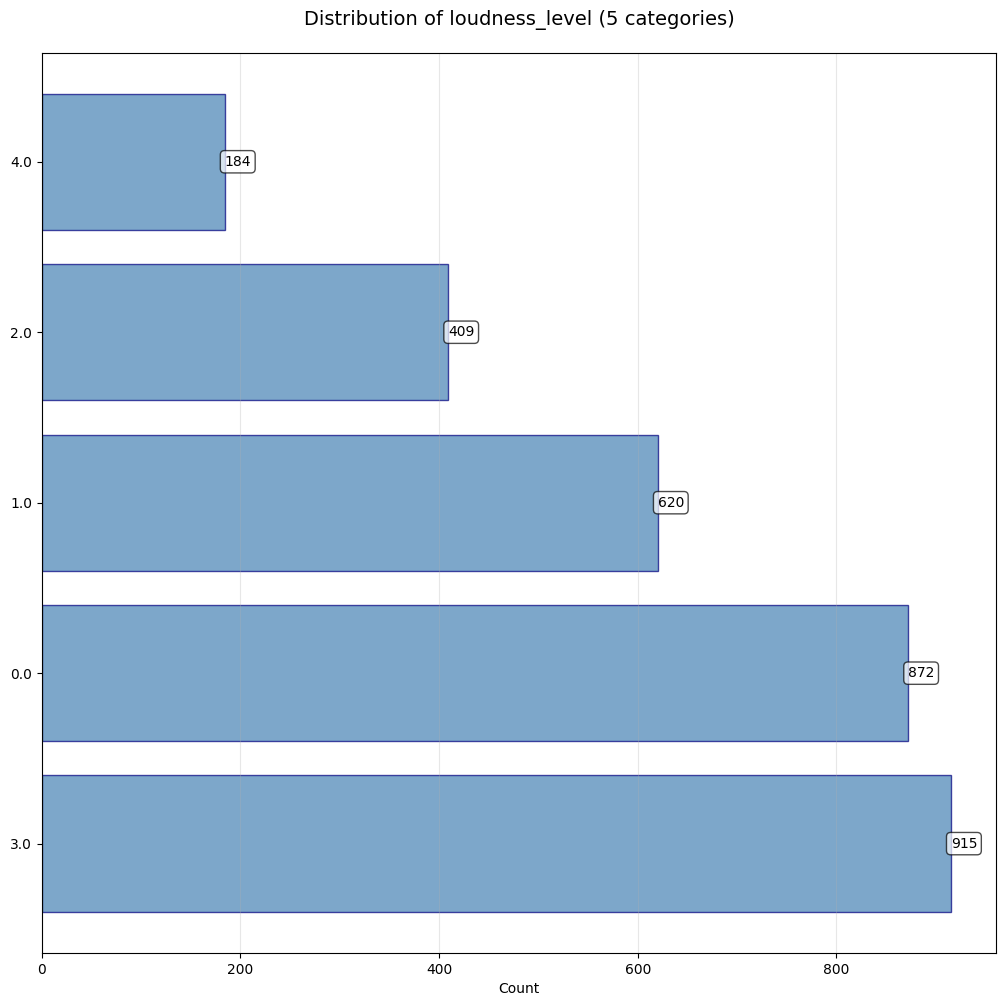

Categories: 5
Most common: '3.0' (915 times)
Least common: '4.0' (184 times)
--------------------------------------------------

Visualizing: popularity_level


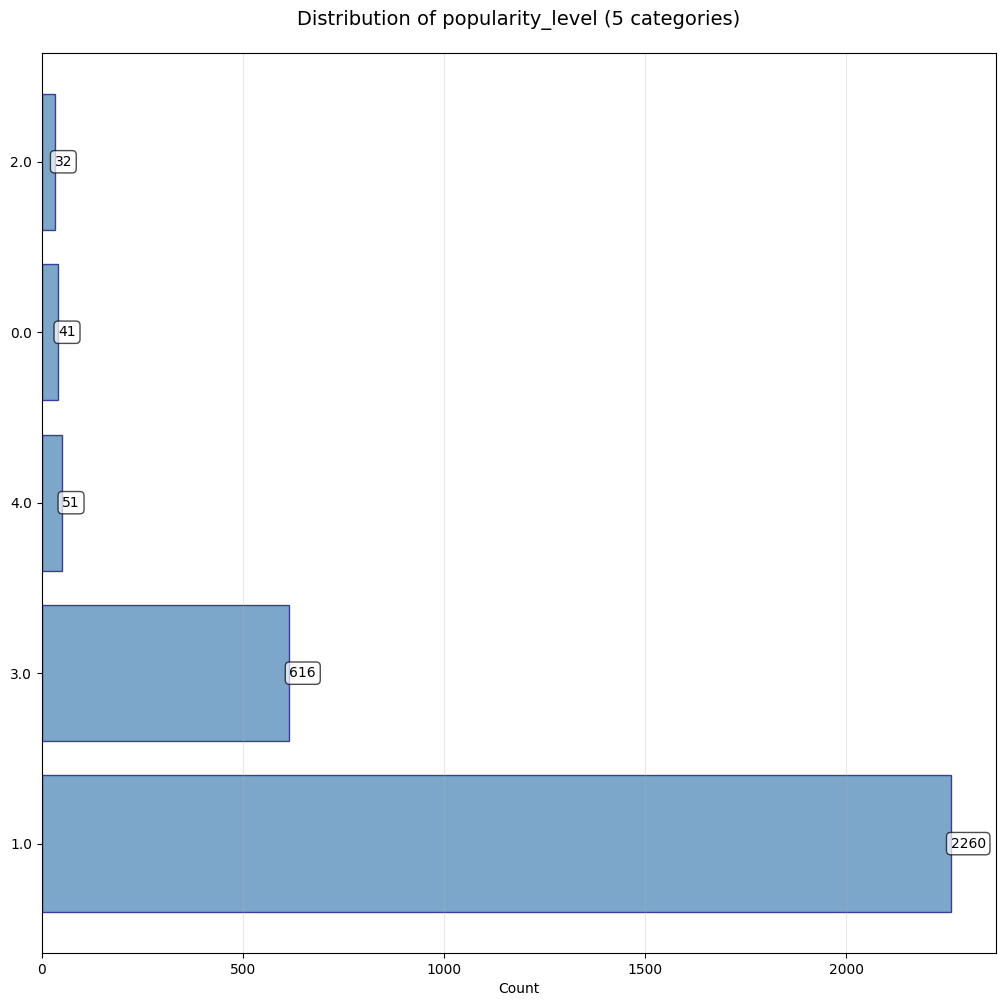

Categories: 5
Most common: '1.0' (2260 times)
Least common: '2.0' (32 times)
--------------------------------------------------

Visualizing: tempo_class


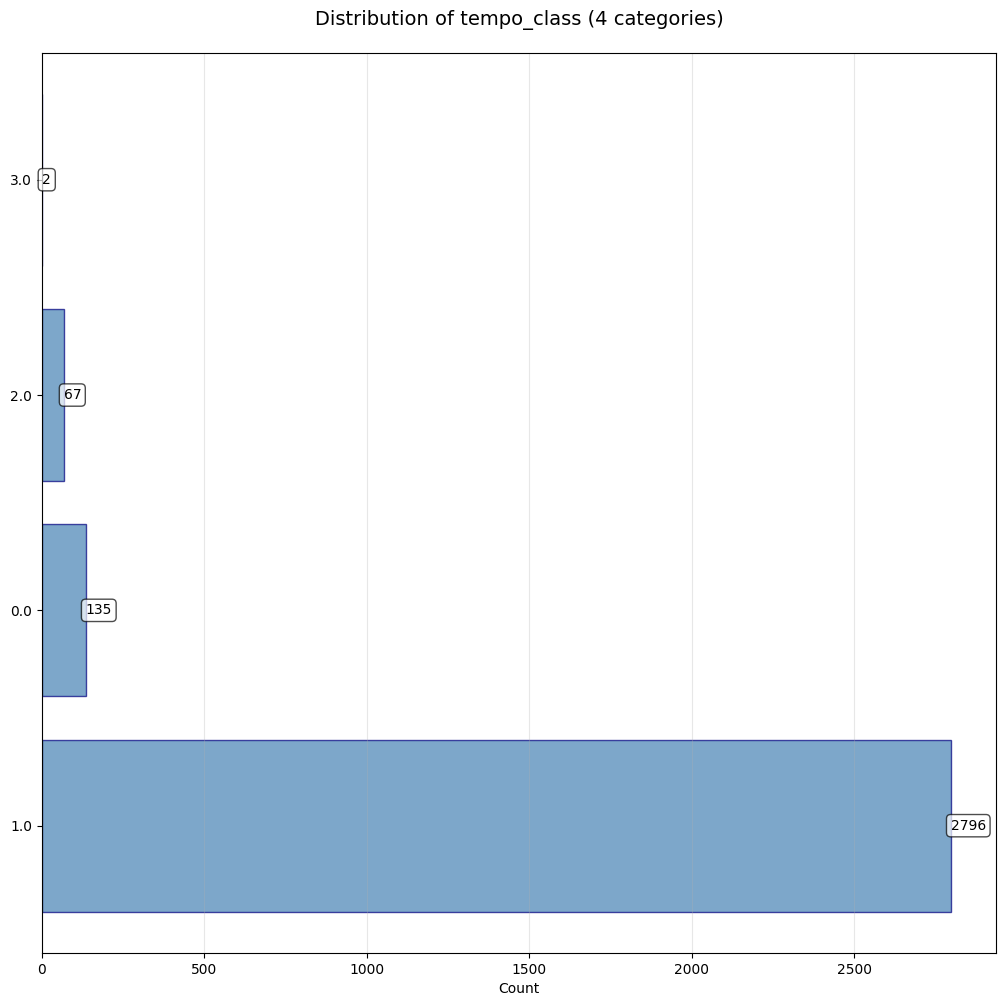

Categories: 4
Most common: '1.0' (2796 times)
Least common: '3.0' (2 times)
--------------------------------------------------

Visualizing: time_signature


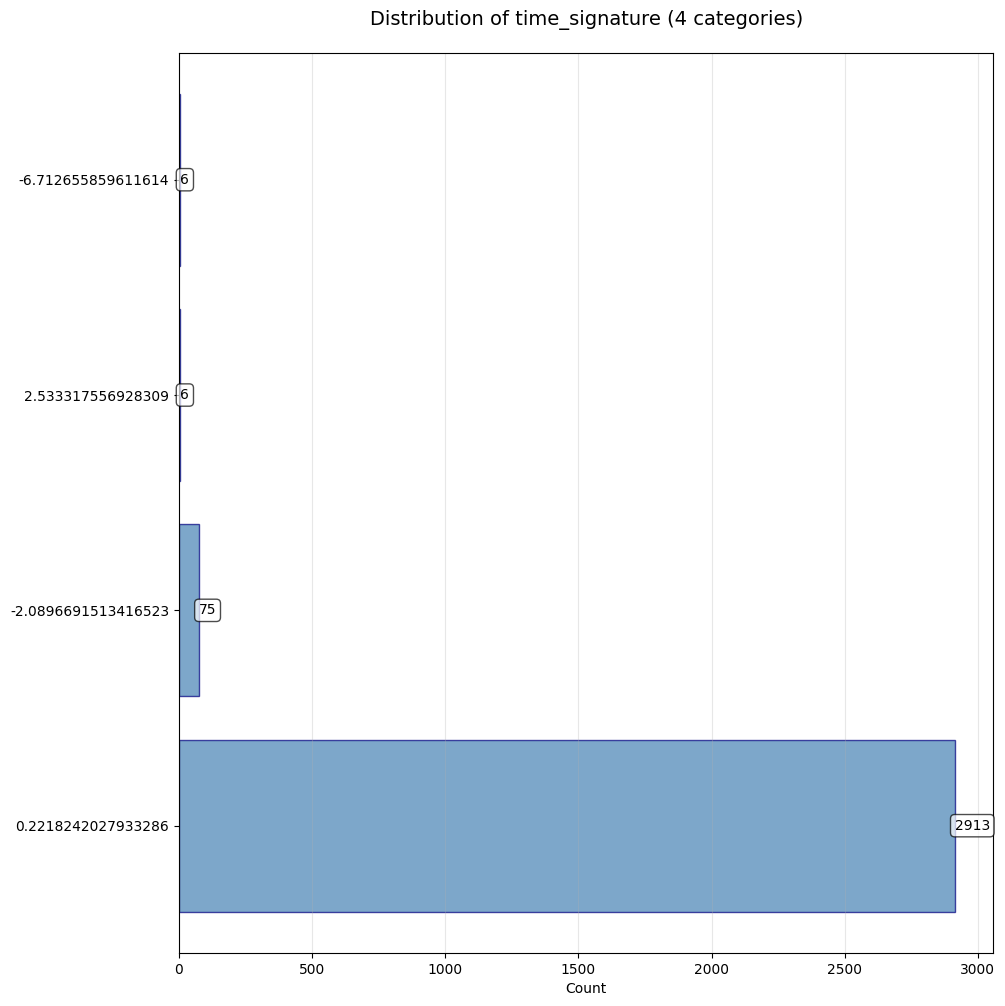

Categories: 4
Most common: '0.2218242027933286' (2913 times)
Least common: '-6.712655859611614' (6 times)
--------------------------------------------------

Visualizing: explicit


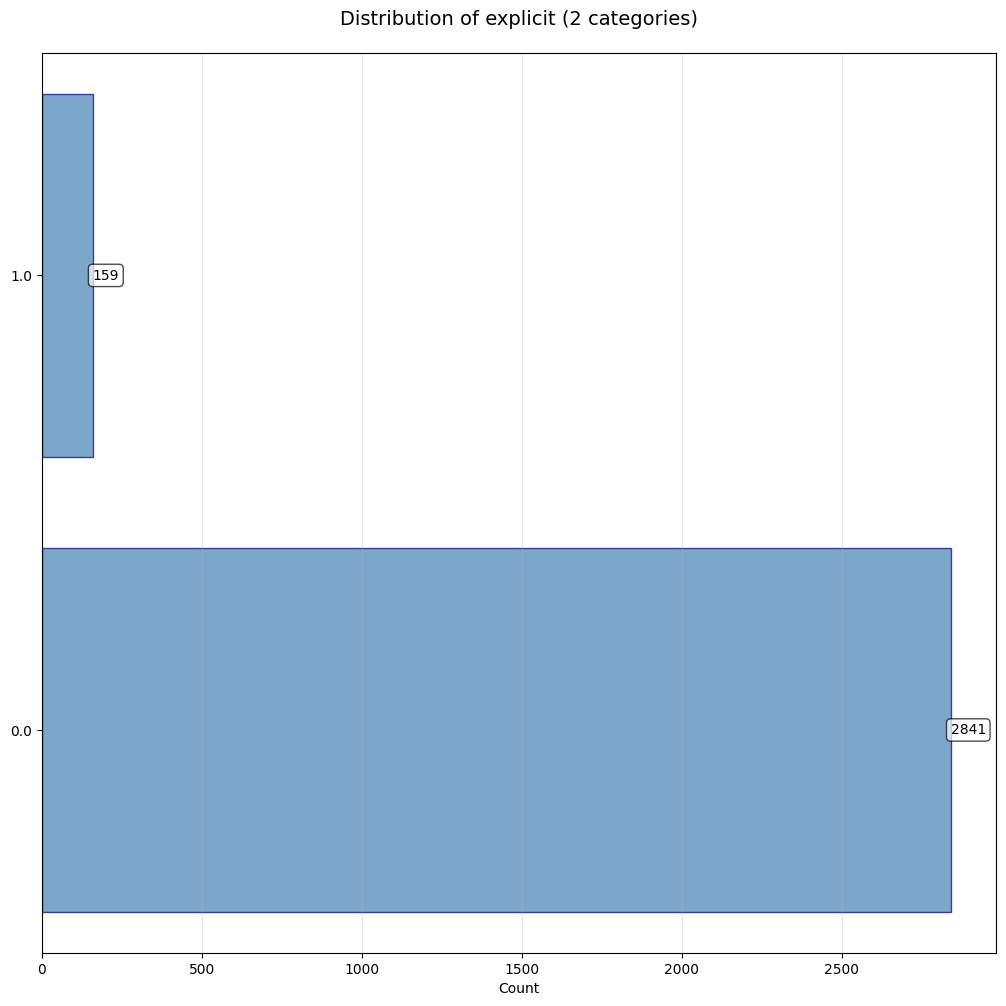

Categories: 2
Most common: '0.0' (2841 times)
Least common: '1.0' (159 times)
--------------------------------------------------

Visualizing: mode_indicator


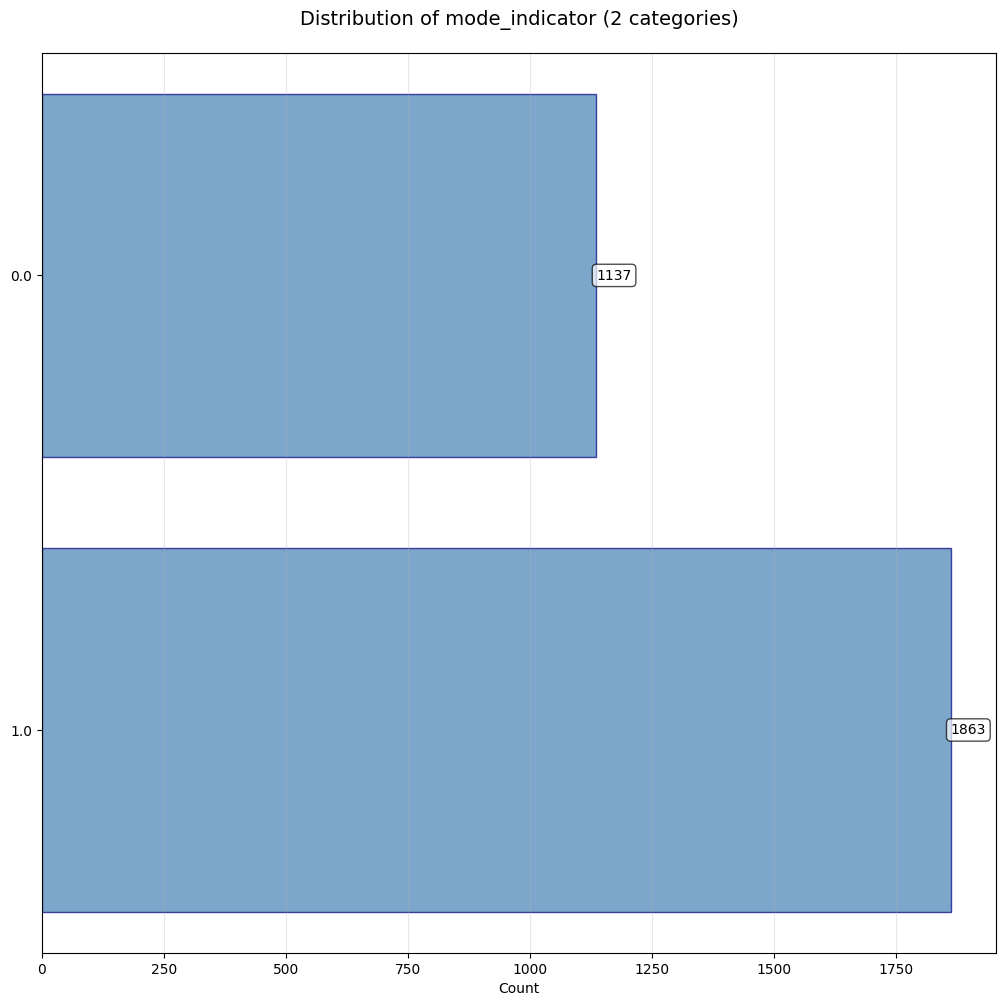

Categories: 2
Most common: '1.0' (1863 times)
Least common: '0.0' (1137 times)
--------------------------------------------------

Visualizing: time_signature_class_boolean


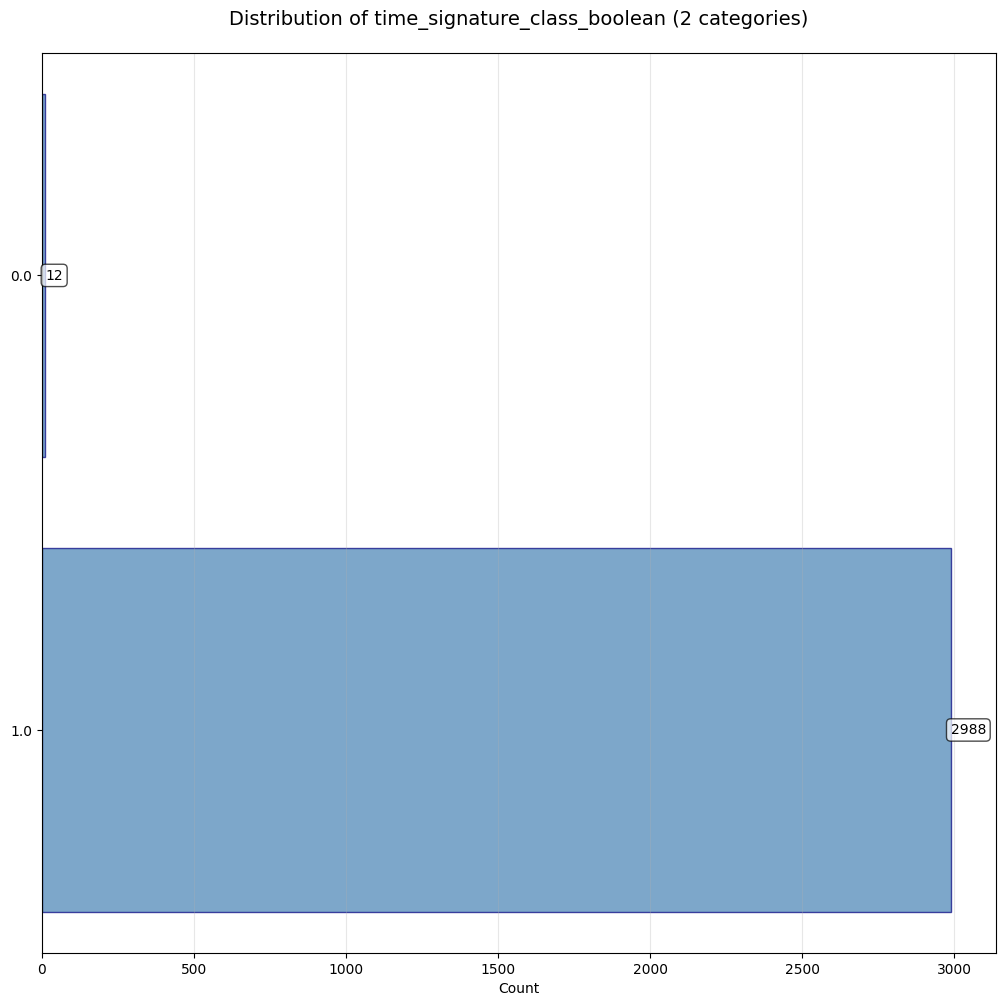

Categories: 2
Most common: '1.0' (2988 times)
Least common: '0.0' (12 times)
--------------------------------------------------

Visualizing: is_instrumental


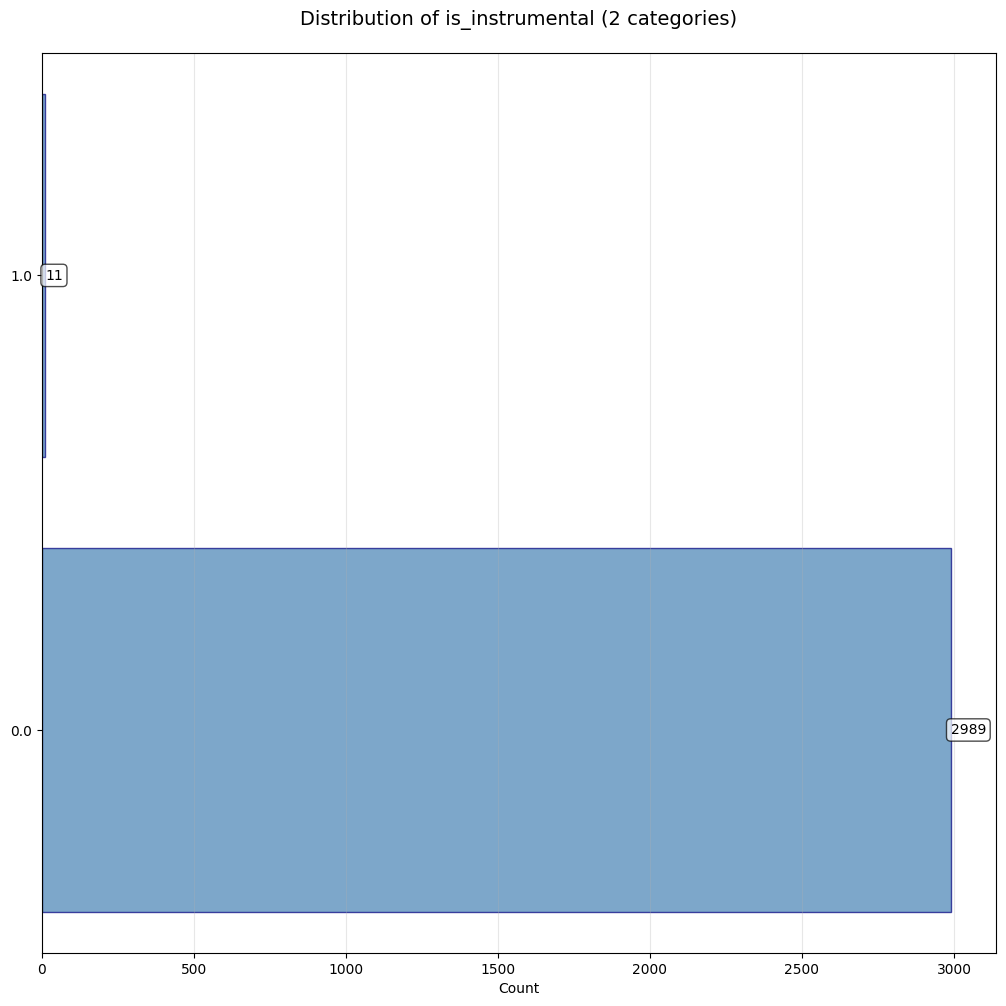

Categories: 2
Most common: '0.0' (2989 times)
Least common: '1.0' (11 times)
--------------------------------------------------

Visualizing: is_dance_hit


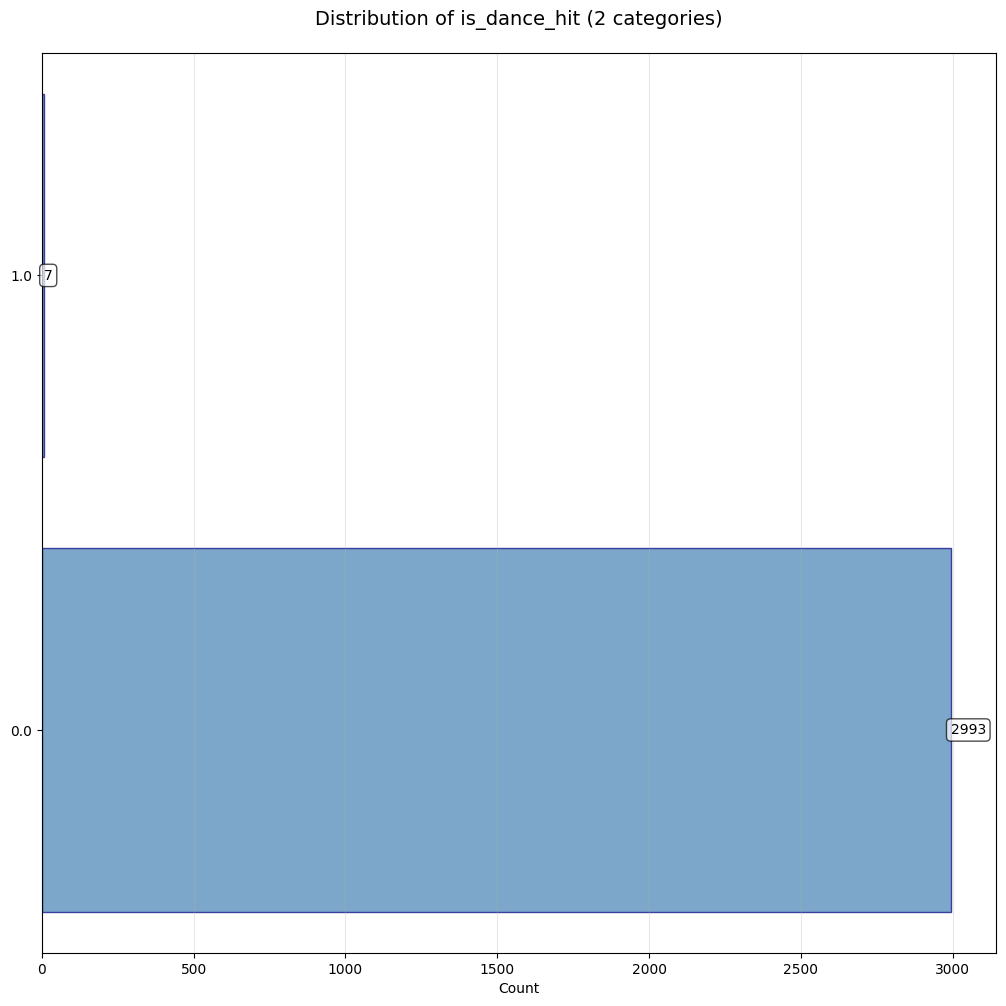

Categories: 2
Most common: '0.0' (2993 times)
Least common: '1.0' (7 times)
--------------------------------------------------

Visualizing: echo_constant


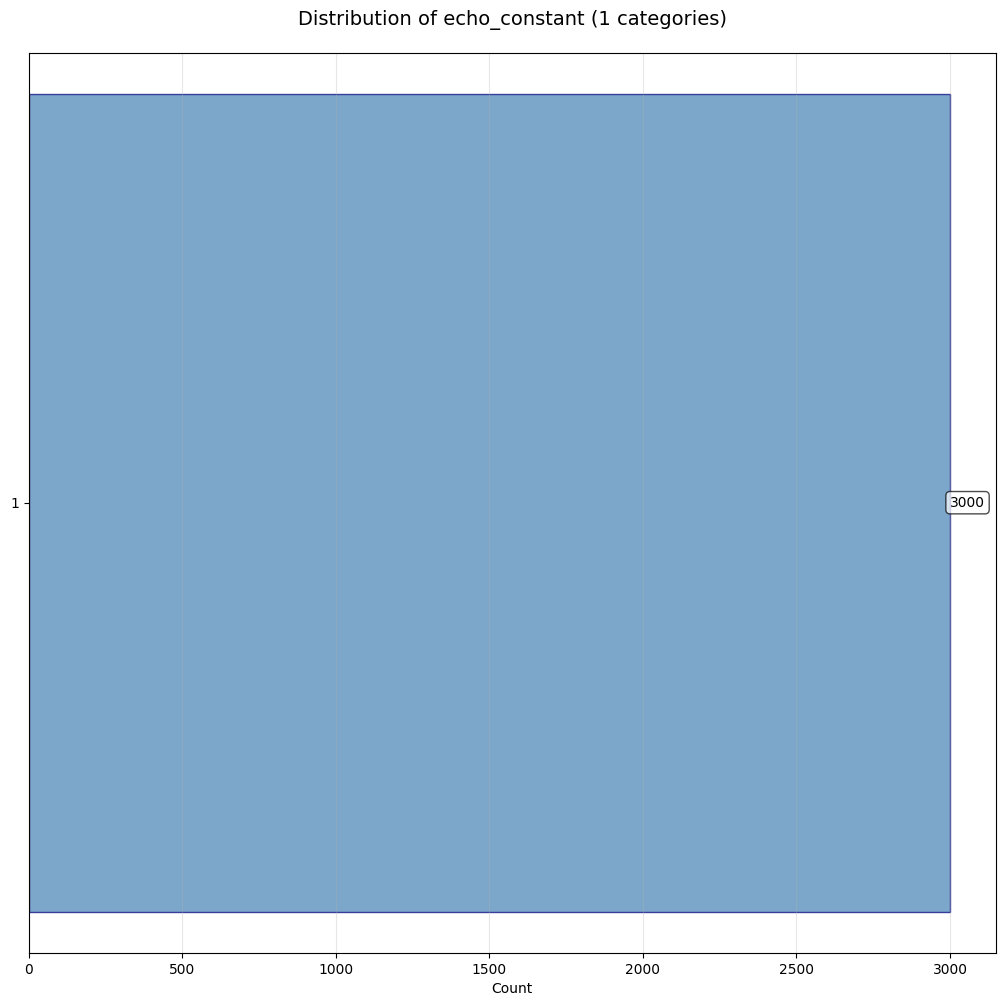

Categories: 1
Most common: '1' (3000 times)
--------------------------------------------------

Visualizing: target_class


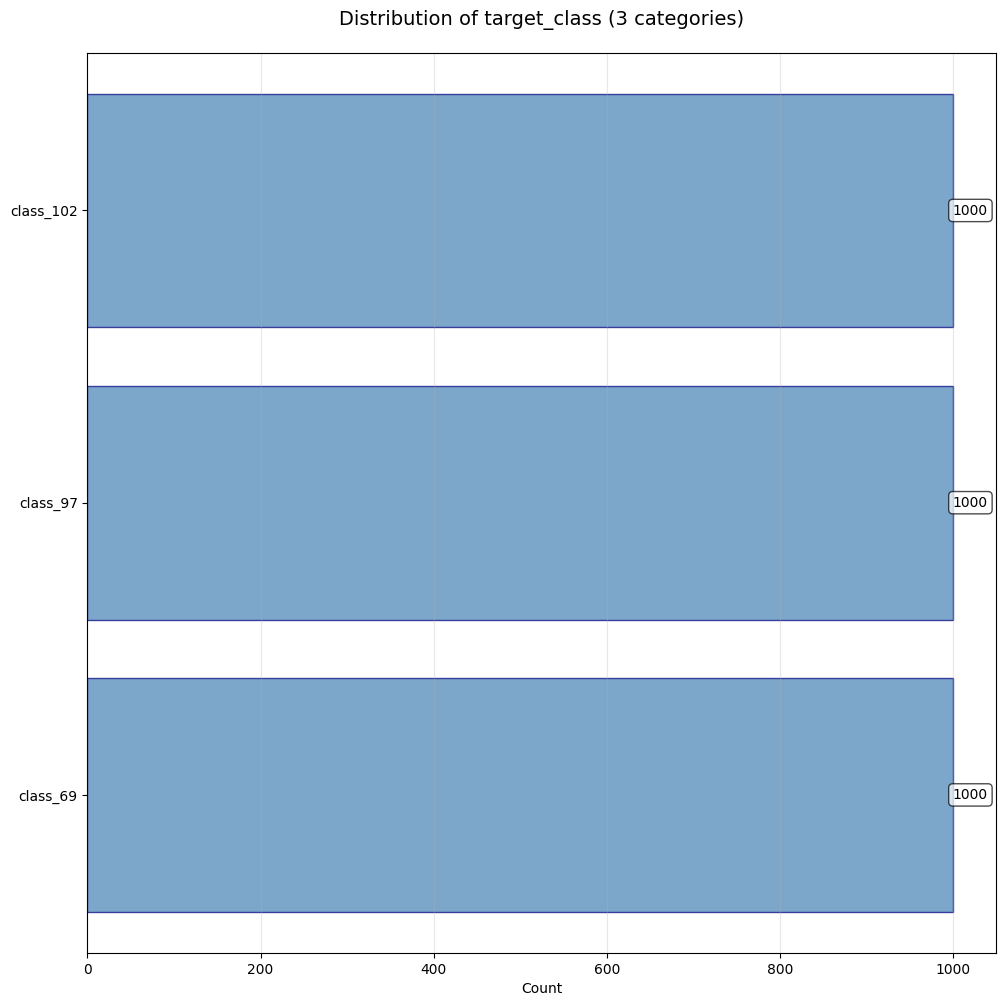

Categories: 3
Most common: 'class_69' (1000 times)
Least common: 'class_102' (1000 times)
--------------------------------------------------


In [38]:
## Bar chart

for col in categorical_cols:
    print(f"\nVisualizing: {col}")
    
    value_counts = data[col].value_counts()
    num_categories = len(value_counts)
    
    # Create figure for this feature
    plt.subplots(figsize=(10, 10))
    
    # For features with many categories, show only top 15
    if num_categories > 15:
        plot_data = value_counts.head(15)
        title_suffix = f" (Top 15 of {num_categories} categories)"
    else:
        plot_data = value_counts
        title_suffix = f" ({num_categories} categories)"
    
    # Create horizontal bar chart
    bars = plt.barh(range(len(plot_data)), plot_data.values, 
                   color='steelblue', alpha=0.7, edgecolor='navy')
    
    plt.yticks(range(len(plot_data)), plot_data.index)
    plt.title(f'Distribution of {col}{title_suffix}', fontsize=14, pad=20)
    plt.xlabel('Count')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
    plt.show()
    
    # Print summary statistics
    print(f"Categories: {num_categories}")
    print(f"Most common: '{value_counts.index[0]}' ({value_counts.iloc[0]} times)")
    if num_categories > 1:
        print(f"Least common: '{value_counts.index[-1]}' ({value_counts.iloc[-1]} times)")
    print("-" * 50)

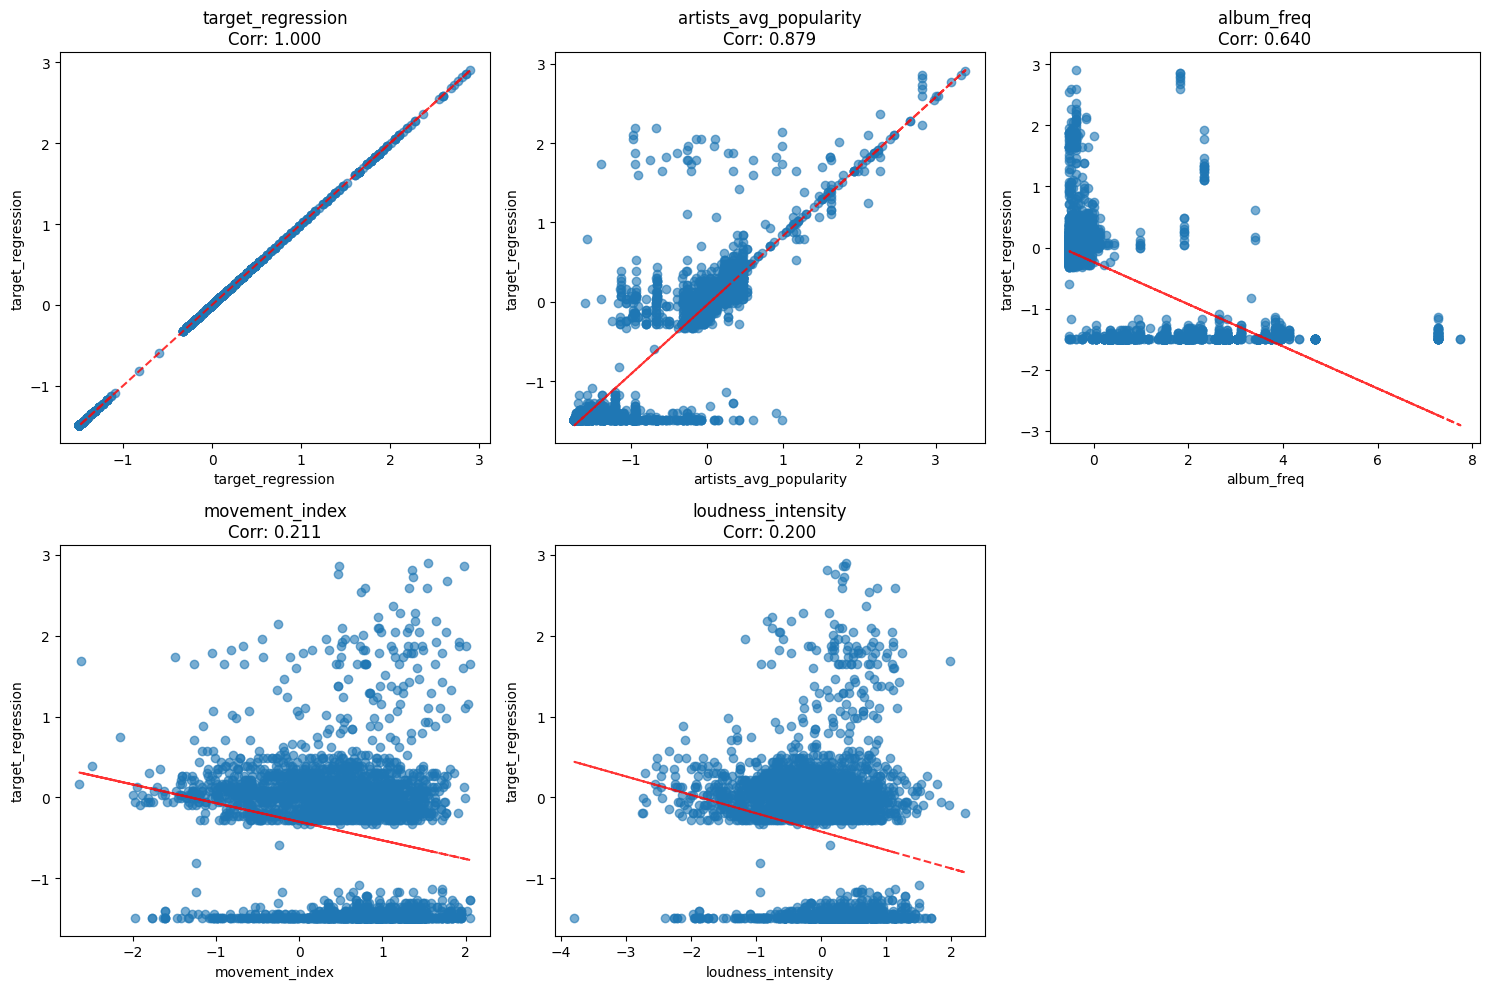

In [33]:
# Calculo de correlação para decidir qual feature usar na simple linear regression
correlations = numerical_cols.corrwith(numerical_cols['target_regression']).abs().sort_values(ascending=False)

# vamos buscar as 5 com maior correlação
top_features = correlations.head(5).index

# graficos para visualizar as relações
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    if i < len(axes):
        # Scatter plot
        axes[i].scatter(numerical_cols[feature], numerical_cols['target_regression'], alpha=0.6)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('target_regression')
        axes[i].set_title(f'{feature}\nCorr: {correlations[feature]:.3f}')
        
        # Add trend line
        z = np.polyfit(numerical_cols[feature], numerical_cols['target_regression'], 1)
        p = np.poly1d(z)
        axes[i].plot(numerical_cols[feature], p(numerical_cols[feature]), "r--", alpha=0.8)

# Hide unused subplots
for i in range(len(top_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [34]:
# artists_avg_popularity é a feature que mais se adequa a regressão linear simples

## Simple Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = numerical_cols[['artists_avg_popularity']]
y = numerical_cols['target_regression']

# divisão do dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# criar e treinar modelo de regressão linear simples

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calcular metricas

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# coeficientes do modelo

slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R² Score: {r2:.4f} ({r2*100:.1f}% variance explained)")
print(f"RMSE: {rmse:.4f}")

Regression equation: y = 0.8692x + -0.0389
R² Score: 0.7843 (78.4% variance explained)
RMSE: 0.4021


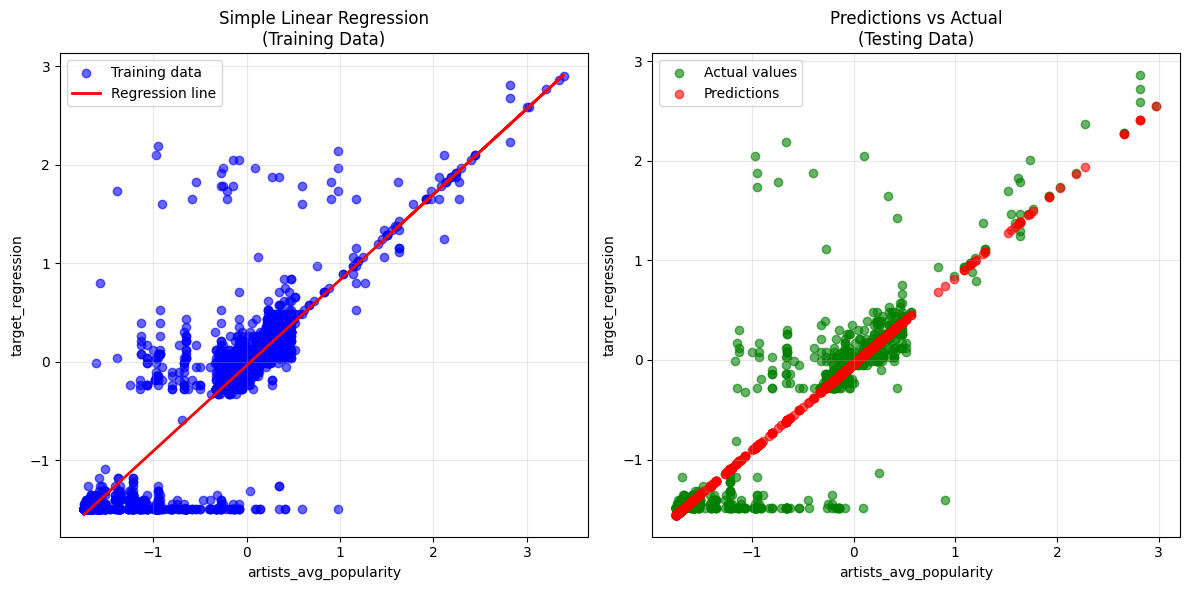

In [36]:
# visualização

# Create visualization
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression line')
plt.xlabel('artists_avg_popularity')
plt.ylabel('target_regression')
plt.title('Simple Linear Regression\n(Training Data)')
plt.legend()
plt.grid(alpha=0.3)

# Plot testing data with predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Actual values')
plt.scatter(X_test, y_pred, alpha=0.6, color='red', label='Predictions')
plt.xlabel('artists_avg_popularity')
plt.ylabel('target_regression')
plt.title('Predictions vs Actual\n(Testing Data)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Logistic Regression

In [44]:
# precisamos de tratar das features categoricas com mais de 2 categoricas (one hot encoding)
# No artificial linearity assumption

categorical_features_to_encode = ['loudness_level', 'popularity_level', 'tempo_class', 'time_signature']

data_logistic = data.copy()
data_logistic = pd.get_dummies(data_logistic, columns=categorical_features_to_encode, 
                              prefix=categorical_features_to_encode, dtype=int)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
### HOLDOUT

X = data_logistic.drop(columns=['target_class', 'target_regression'], errors='ignore')
y = data_logistic['target_class']

print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Target classes: {y.unique()}")

Features: 61, Samples: 3000
Target classes: ['class_69' 'class_97' 'class_102']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # maintain class distribution
)

# scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train logistic regression model
logistic_model = LogisticRegression(
    solver='lbfgs',             # Good for multiclass problems
    max_iter=1000,              # Ensure convergence
    random_state=42
)

logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [50]:
# predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)

# accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Overall Accuracy: 0.9483 (94.83%)

 Classification Report:
              precision    recall  f1-score   support

   class_102       0.98      0.93      0.95       200
    class_69       0.94      0.96      0.95       200
    class_97       0.93      0.95      0.94       200

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



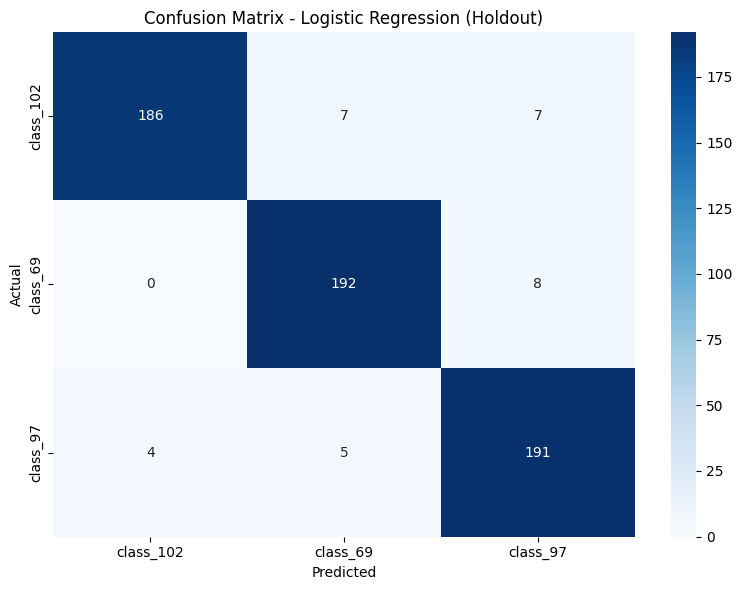

In [52]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logistic_model.classes_, 
            yticklabels=logistic_model.classes_)
plt.title('Confusion Matrix - Logistic Regression (Holdout)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


 TOP 10 MOST IMPORTANT FEATURES:
                   feature  coefficient_magnitude
18          tempo_vs_genre               9.505723
13           activity_rate               4.742771
37             temp_zscore               4.742771
7               album_freq               0.627187
17  artists_avg_popularity               0.587985
8           movement_index               0.580061
11            purity_score               0.558737
20       loud_energy_ratio               0.443322
15             happy_dance               0.348847
25         signal_strength               0.248969


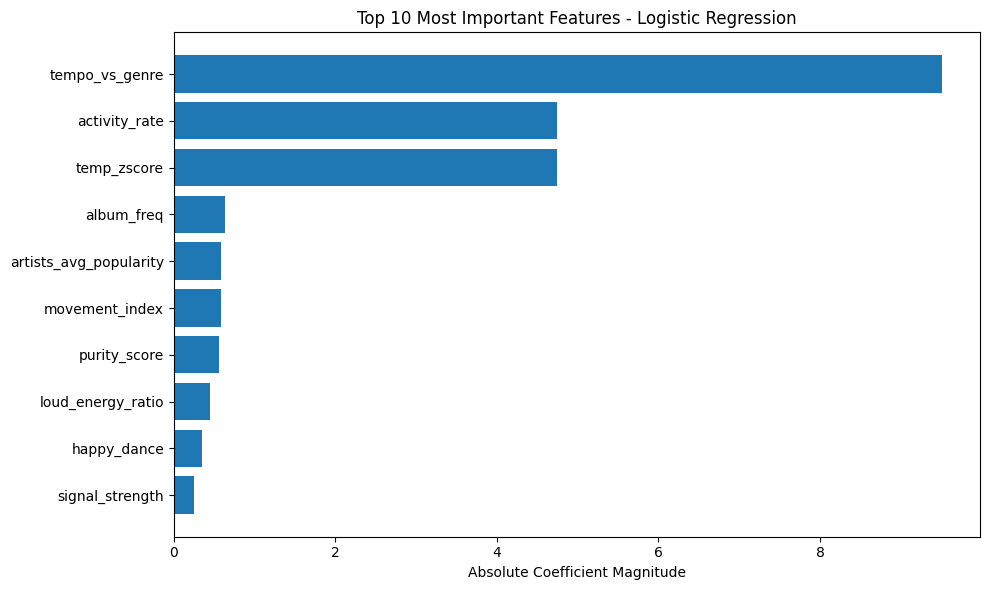

In [54]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient_magnitude': np.abs(logistic_model.coef_[0])  # coeficientes da primeira classe
})

feature_importance = feature_importance.sort_values('coefficient_magnitude', ascending=False)

print("\n TOP 10 MOST IMPORTANT FEATURES:")
print("=" * 40)
print(feature_importance.head(10))

# Visualize top features
plt.figure(figsize=(10, 6))
top_10 = feature_importance.head(10)
plt.barh(top_10['feature'], top_10['coefficient_magnitude'])
plt.xlabel('Absolute Coefficient Magnitude')
plt.title('Top 10 Most Important Features - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [58]:
### CROSS VALIDATION

from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_cross_validation(X, y, k_values=[5, 10]):
    """Evaluate logistic regression with k-fold cross-validation"""
    
    # inicializar modelo
    logistic_model = LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
    
    cv_results = {}
    
    for k in k_values:
        print(f"\n{'='*50}")
        print(f"{k}-FOLD CROSS VALIDATION")
        print(f"{'='*50}")
        
        # cross-validation com estas métricas
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        cv_scores = cross_validate(logistic_model, X, y, 
                                  cv=k, scoring=scoring, 
                                  return_train_score=True,
                                  return_estimator=True)
        
        # GUARDAR resultados
        cv_results[k] = {
            'test_accuracy': cv_scores['test_accuracy'],
            'train_accuracy': cv_scores['train_accuracy'],
            'test_precision': cv_scores['test_precision_macro'],
            'test_recall': cv_scores['test_recall_macro'],
            'test_f1': cv_scores['test_f1_macro'],
            'estimators': cv_scores['estimator']
        }
        
        # Print results
        print(f"ACCURACY RESULTS:")
        print(f"  Test Accuracy: {cv_scores['test_accuracy'].mean():.4f} (+/- {cv_scores['test_accuracy'].std() * 2:.4f})")
        print(f"  Train Accuracy: {cv_scores['train_accuracy'].mean():.4f} (+/- {cv_scores['train_accuracy'].std() * 2:.4f})")
        
        print(f"\nDETAILED METRICS:")
        print(f"  Precision: {cv_scores['test_precision_macro'].mean():.4f} (+/- {cv_scores['test_precision_macro'].std() * 2:.4f})")
        print(f"  Recall:    {cv_scores['test_recall_macro'].mean():.4f} (+/- {cv_scores['test_recall_macro'].std() * 2:.4f})")
        print(f"  F1-Score:  {cv_scores['test_f1_macro'].mean():.4f} (+/- {cv_scores['test_f1_macro'].std() * 2:.4f})")
        
        print(f"\nFOLD-BY-FOLD ACCURACIES:")
        for i, score in enumerate(cv_scores['test_accuracy']):
            print(f"  Fold {i+1}: {score:.4f}")
    
    return cv_results, logistic_model

# correr a função cross val
cv_results, model = evaluate_cross_validation(X_scaled, y, k_values=[5, 10])


5-FOLD CROSS VALIDATION
ACCURACY RESULTS:
  Test Accuracy: 0.9453 (+/- 0.0420)
  Train Accuracy: 0.9738 (+/- 0.0016)

DETAILED METRICS:
  Precision: 0.9488 (+/- 0.0352)
  Recall:    0.9453 (+/- 0.0420)
  F1-Score:  0.9454 (+/- 0.0417)

FOLD-BY-FOLD ACCURACIES:
  Fold 1: 0.9100
  Fold 2: 0.9717
  Fold 3: 0.9500
  Fold 4: 0.9583
  Fold 5: 0.9367

10-FOLD CROSS VALIDATION
ACCURACY RESULTS:
  Test Accuracy: 0.9533 (+/- 0.0526)
  Train Accuracy: 0.9749 (+/- 0.0041)

DETAILED METRICS:
  Precision: 0.9573 (+/- 0.0393)
  Recall:    0.9533 (+/- 0.0526)
  F1-Score:  0.9534 (+/- 0.0515)

FOLD-BY-FOLD ACCURACIES:
  Fold 1: 0.8867
  Fold 2: 0.9633
  Fold 3: 0.9900
  Fold 4: 0.9600
  Fold 5: 0.9500
  Fold 6: 0.9700
  Fold 7: 0.9533
  Fold 8: 0.9700
  Fold 9: 0.9567
  Fold 10: 0.9333
